In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/eyes1.csv", encoding= 'unicode_escape') #엑셀 데이터를 연결

In [ ]:
X = []
y = []
for i, rows in data.iterrows(): #한줄씩 나열 row집어넣는다
  X.append([ rows['age'], rows['c_time'] , rows['lvl'], rows['day-time']])
  y.append( rows['y'] )

for xxx, yyy in zip(X[:3], y[:3]):
  print(yyy, xxx)

0.0 [56.0, 11.0, 0.5, 0.0]
0.0 [48.0, 13.0, 0.5, 0.0]
0.0 [17.0, 10.0, 0.3, 0.0]


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=34)

In [ ]:
x_train, y_train
x_valid, y_valid

([[17.0, 1.0, 1.8, 0.0],
  [17.0, 1.0, 2.0, 1.0],
  [17.0, 3.0, 0.4, 1.0],
  [20.0, 1.0, 0.8, 1.0],
  [17.0, 1.0, 0.7, 0.0],
  [17.0, 3.0, 0.4, 1.0],
  [17.0, 8.0, 0.1, 0.0],
  [17.0, 3.0, 1.8, 0.0],
  [17.0, 2.0, 2.0, 1.0],
  [17.0, 15.0, 0.2, 0.0],
  [17.0, 1.0, 2.0, 1.0],
  [17.0, 6.0, 1.1, 0.0],
  [17.0, 10.0, 0.7, 0.0],
  [17.0, 1.0, 2.0, 1.0],
  [17.0, 10.0, 0.1, 0.0],
  [17.0, 8.0, 0.1, 0.0],
  [17.0, 6.0, 0.4, 0.0],
  [17.0, 6.0, 0.4, 0.0],
  [17.0, 6.0, 0.4, 0.0],
  [17.0, 3.0, 2.0, 1.0],
  [17.0, 5.0, 0.5, 0.0]],
 [1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  0.0,
  0.0,
  1.0,
  1.0,
  0.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  1.0,
  1.0])

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(5, activation='relu'),  #렐루 : 기울기를 소실막는거 학습을 용이하게 한다
  tf.keras.layers.Dense(1, activation='sigmoid'), #0 ~ 1
])
model.compile(optimizer = 'adam',loss='binary_crossentropy',metrics = ['accuracy'])

model.fit( x_train, y_train, epochs=300)

Epoch 1/300
3/3 [==============================] - 6s 11ms/step - loss: 0.9111 - accuracy: 0.6125
Epoch 2/300
3/3 [==============================] - 0s 6ms/step - loss: 0.8019 - accuracy: 0.6125
Epoch 3/300
3/3 [==============================] - 0s 6ms/step - loss: 0.7375 - accuracy: 0.6125
Epoch 4/300
3/3 [==============================] - 0s 6ms/step - loss: 0.7100 - accuracy: 0.6125
Epoch 5/300
3/3 [==============================] - 0s 7ms/step - loss: 0.6930 - accuracy: 0.6125
Epoch 6/300
3/3 [==============================] - 0s 6ms/step - loss: 0.6873 - accuracy: 0.6125
Epoch 7/300
3/3 [==============================] - 0s 7ms/step - loss: 0.6846 - accuracy: 0.6125
Epoch 8/300
3/3 [==============================] - 0s 8ms/step - loss: 0.6830 - accuracy: 0.6125
Epoch 9/300
3/3 [==============================] - 0s 9ms/step - loss: 0.6826 - accuracy: 0.6125
Epoch 10/300
3/3 [==============================] - 0s 8ms/step - loss: 0.6817 - accuracy: 0.6125
Epoch 11/300
3/3 [==========

In [ ]:
y_pred = model.predict( x_valid )

1/1 [==============================] - 0s 96ms/step


In [ ]:
cnt = 0

for y_, y in zip(y_pred, y_valid):
  y_ = 1 if y_ > 0.5 else 0
  if y_ == y:
    cnt += 1

print(cnt/len(y_pred))

1.0


In [ ]:
x_valid[0]

[17.0, 1.0, 1.8, 0.0]

In [ ]:
y_valid[0]

1.0

In [ ]:
input_data = input('age c_time |v| day-time : ')

age c_time |v| day-time : 17 5 10 1


In [ ]:
x_input = [*map(lambda x: float(x),input_data.split())]
x_input

[17.0, 5.0, 10.0, 1.0]

In [ ]:
model.predict([x_input]) #중독일 아닐 확율 낮을수록 중독 높을수록 중독이 아님

1/1 [==============================] - 0s 36ms/step


array([[1.]], dtype=float32)

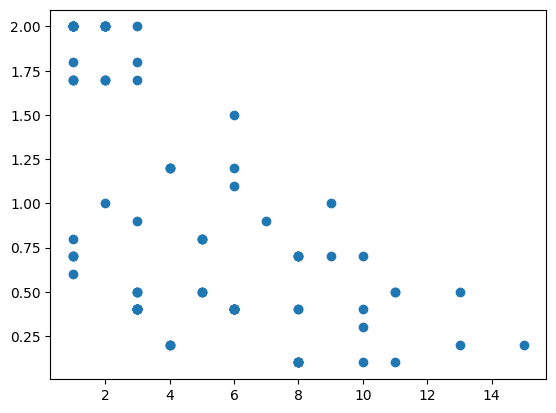

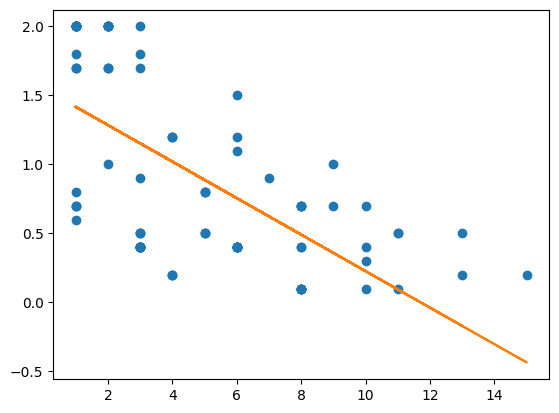

In [ ]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/eyes1.csv")
data = data.dropna()#오차를 줄이기 위해 이용

x = data["c_time"]
y = data["lvl"]

plt.plot(x, y,'o')
plt.show()

line_fitter = LinearRegression()
line_fitter.fit(x.values.reshape(-1,1), y)

line_fitter.predict([[70]])
line_fitter.coef_
line_fitter.intercept_

plt.plot(x, y, 'o')
plt.plot(x,line_fitter.predict(x.values.reshape(-1,1)))
plt.show()

In [ ]:
data['y'],data['c_time'] #연습 데이터

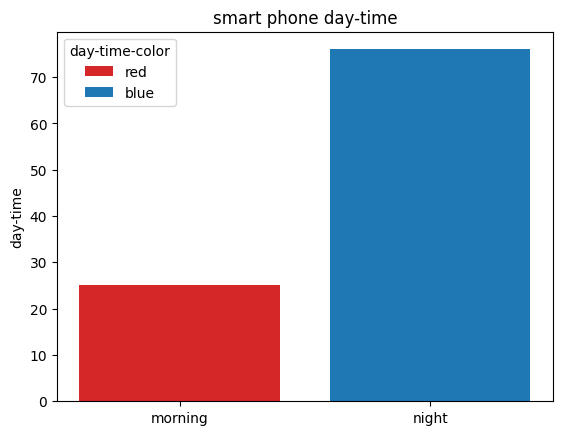

In [ ]:
import matplotlib.pyplot as plt
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/eyes1.csv")
data = data.dropna()#오차를 줄이기 위해 이용
cnt1 = 0
cnt2 = 0

fig, ax = plt.subplots()
for y in data['day-time']:
  if(y == 1):
    cnt1+=1

for x in data['day-time']: #한줄씩 나열 i row집어넣는다
  if (x == 0) :
    cnt2+=1

dt = ['morning', 'night']

counts =  [cnt1,cnt2 ]
bar_labels = ['red', 'blue']
bar_colors = ['tab:red','tab:blue']

ax.bar(dt, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('day-time')
ax.set_title('smart phone day-time')
ax.legend(title='day-time-color')

plt.show()
